$\textbf{Daniel Jeffry}$ <br>
Email : danieljeffry62@gmail.com<br>
Phone : +6281213099624<br>
Linkedin : https://www.linkedin.com/in/daniel-jeffry-a91760203/
<br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook')
sns.set_style("whitegrid", {'axes.grid' : False})
plt.tight_layout()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
df = pd.read_csv("loan_data_2007_2014.csv")

# Load and Describe Data

In [8]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
# create a new column based on the loan_status column that will be our target variable
df['bad_loan'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)',
                                        'Does not meet the credit policy. Status:Charged Off']), 0, 1)
# Drop the original 'loan_status' column
df.drop(columns = ['loan_status'], inplace = True)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [11]:
X = df.drop('bad_loan', axis = 1)
y = df['bad_loan']

In [13]:
## display first 10 rows data
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,bad_loan
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [14]:
#show columns that have more than 70% missing values
missing_values = df.isnull().mean()
missing_values[missing_values>0.7]

desc                           0.729815
mths_since_last_record         0.865666
mths_since_last_major_derog    0.787739
annual_inc_joint               1.000000
dti_joint                      1.000000
verification_status_joint      1.000000
open_acc_6m                    1.000000
open_il_6m                     1.000000
open_il_12m                    1.000000
open_il_24m                    1.000000
mths_since_rcnt_il             1.000000
total_bal_il                   1.000000
il_util                        1.000000
open_rv_12m                    1.000000
open_rv_24m                    1.000000
max_bal_bc                     1.000000
all_util                       1.000000
inq_fi                         1.000000
total_cu_tl                    1.000000
inq_last_12m                   1.000000
dtype: float64

# Data Preprocessing

* We need to drop the columns having > 70% missing values.<br><br>
* The following features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode and emp_title.<br><br>
* The sub_grade column wll also be droped as it contains the same information as the grade columns.<br><br>
* Features that contain information about the future will not be included in building the model since those events are yet to occur. The features include next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp and total_rec_late_fee.<br><br>

In [16]:
#dropping irrelevant columns and rows with missing values

columns_to_drop = ['id', 'member_id', 'sub_grade', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'next_pymnt_d',
                  'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee', 'desc', 'mths_since_last_record',
                  'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m',
                  'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m','policy_code',]
df.drop(columns=columns_to_drop, inplace=True, axis=1)
#dropping all missing values
df.dropna(inplace=True)

## Checking Correlation among Features

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]),
 [Text(0, 0.5, 'loan_amnt'),
  Text(0, 2.5, 'funded_amnt_inv'),
  Text(0, 4.5, 'installment'),
  Text(0, 6.5, 'dti'),
  Text(0, 8.5, 'inq_last_6mths'),
  Text(0, 10.5, 'open_acc'),
  Text(0, 12.5, 'revol_bal'),
  Text(0, 14.5, 'total_acc'),
  Text(0, 16.5, 'out_prncp_inv'),
  Text(0, 18.5, 'total_pymnt_inv'),
  Text(0, 20.5, 'last_pymnt_amnt'),
  Text(0, 22.5, 'acc_now_delinq'),
  Text(0, 24.5, 'tot_cur_bal'),
  Text(0, 26.5, 'bad_loan')])

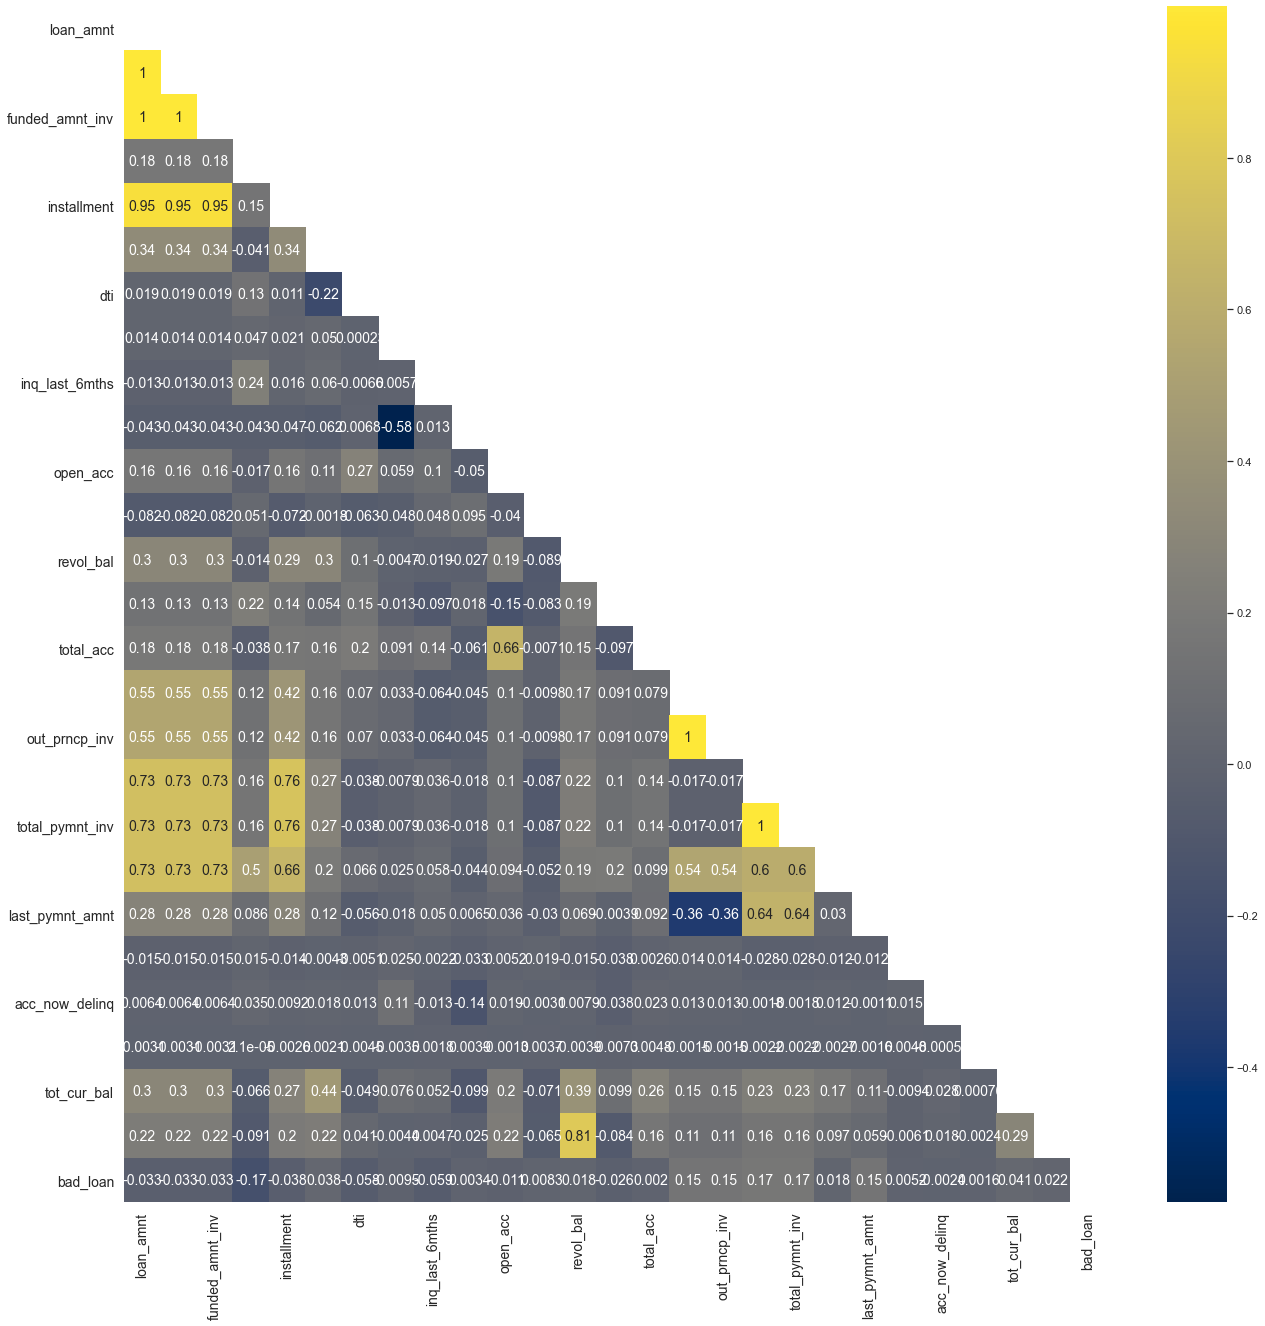

In [17]:
# correlation matrix showing correlation co-effiecients 

mask = np.zeros_like(df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, mask=mask, annot=True,  cmap="cividis", annot_kws={'size':14})
heatmap=plt.gcf()
heatmap.set_size_inches(22,22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Removing Multicollier Features

In [18]:
df.drop(columns=['loan_amnt', 'revol_bal', 'funded_amnt', 'funded_amnt_inv', 'installment',  
                   'total_pymnt_inv',  'out_prncp_inv',  'total_acc'], inplace=True)

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5]),
 [Text(0, 0.5, 'int_rate'),
  Text(0, 2.5, 'dti'),
  Text(0, 4.5, 'inq_last_6mths'),
  Text(0, 6.5, 'open_acc'),
  Text(0, 8.5, 'revol_util'),
  Text(0, 10.5, 'total_pymnt'),
  Text(0, 12.5, 'last_pymnt_amnt'),
  Text(0, 14.5, 'acc_now_delinq'),
  Text(0, 16.5, 'tot_cur_bal'),
  Text(0, 18.5, 'bad_loan')])

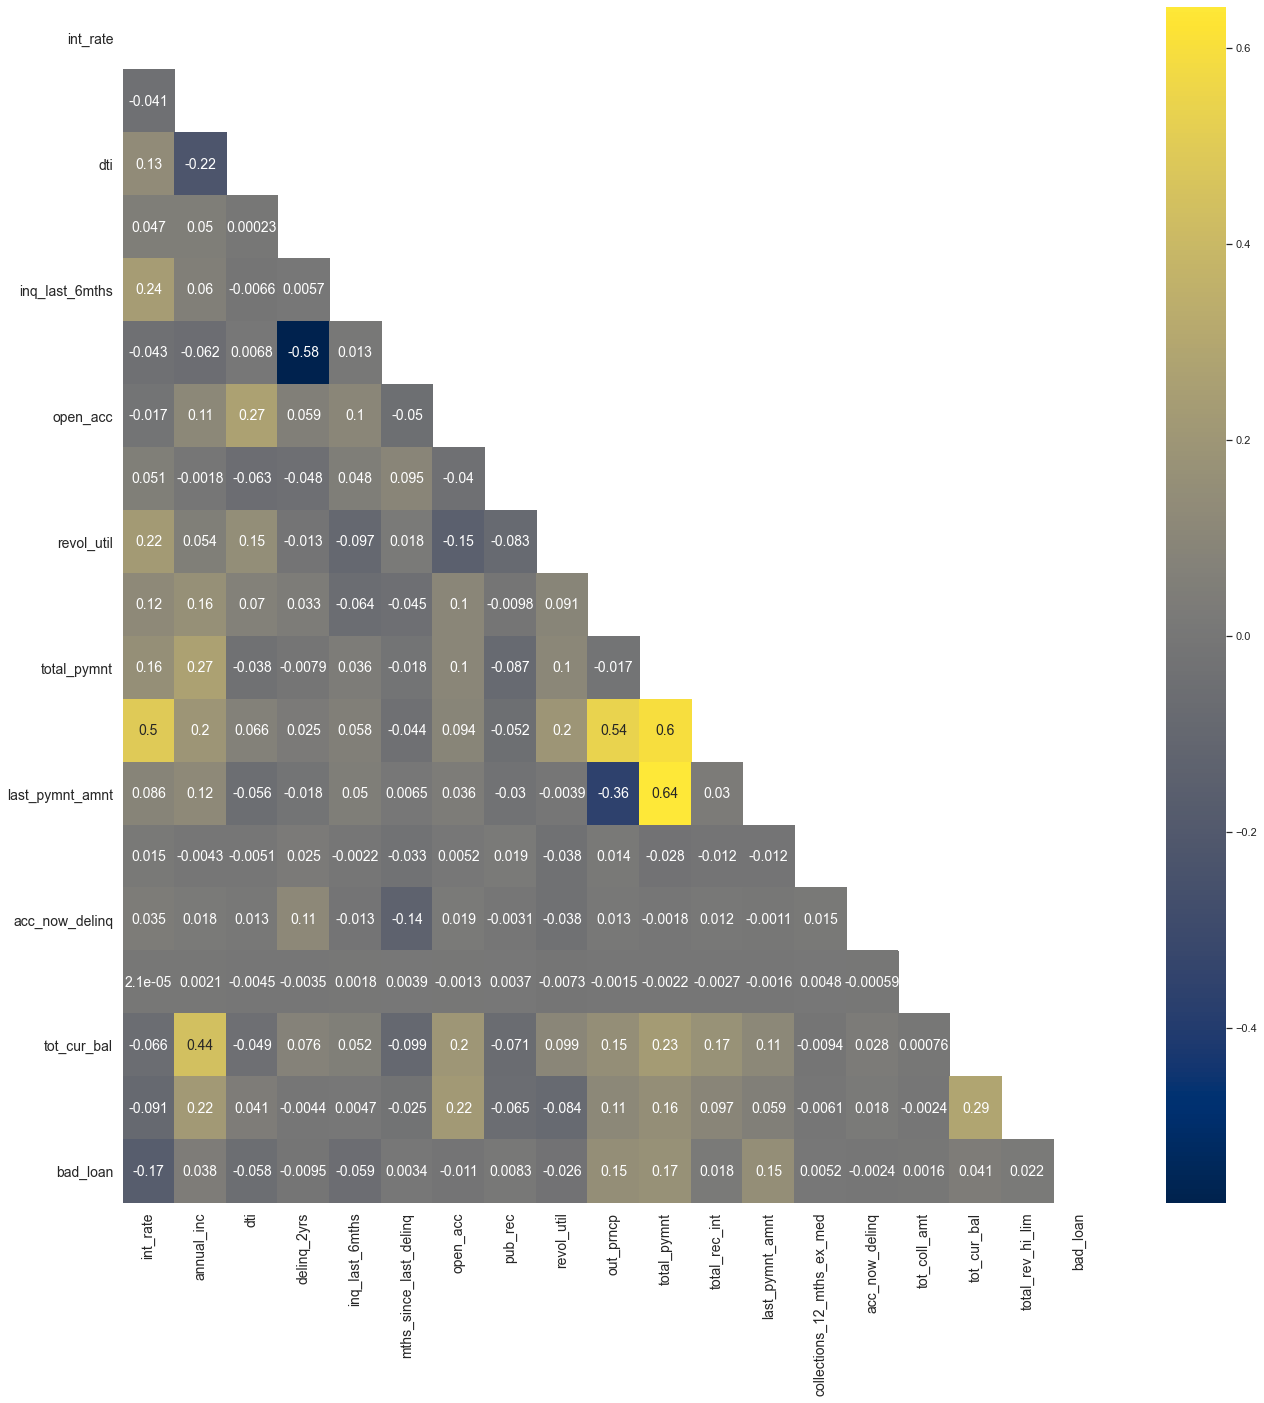

In [19]:
mask = np.zeros_like(df.corr().fillna(0), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

corr_matrix = df.corr()
heatMap=sns.heatmap(corr_matrix, mask=mask, annot=True,  cmap="cividis", annot_kws={'size':14})
heatmap=plt.gcf()
heatmap.set_size_inches(22,22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Data Type Transformation

The following variables are not possessing appropriate data types and should be modified. Also the NaN values should be replaced with zeroes wherever applicable (emp_length, term, issue_d, last_pymnt_d, last_credit_pull_d and earliest_cr_line)

We will define functions to transform their data types.

In [22]:
# converting emp_length to numerical column and assign NaN values to zero

def emp_length_convert(df1, column):
    df1[column] = df1[column].str.replace('\+ years', '')
    df1[column] = df1[column].str.replace('< 1 year', str(0))
    df1[column] = df1[column].str.replace(' years', '')
    df1[column] = df1[column].str.replace(' year', '')
    df1[column] = pd.to_numeric(df1[column])
    df1[column].fillna(value = 0, inplace = True)
    

emp_length_convert(df, 'emp_length')

df['emp_length'].unique()

array([10,  2,  4,  7,  6,  5,  8,  3,  1,  0,  9], dtype=int64)

In [25]:
# converting term column to numeric data type

def term_numeric(df1, column):
    df1[column] = pd.to_numeric(df1[column].str.replace(' months', ''))
    
term_numeric(df, 'term')

In [26]:
# preprocessing date columns 

def date_columns(df1, column):
    # store current month
    today_date = pd.to_datetime('2020-08-01')
    # convert to datetime format
    df1[column] = pd.to_datetime(df1[column], format = "%b-%y")
    # calculate the difference in months and add to a new column
    df1['mths_since_' + column] = round(pd.to_numeric((today_date - df1[column]) / np.timedelta64(1, 'M')))
    # make any resulting -ve values to be equal to the max date
    df1['mths_since_' + column] = df1['mths_since_' + column].apply(lambda x: df1['mths_since_' + column].max() if x < 0 else x)
    # drop the original date column
    df1.drop(columns = [column], inplace = True)
    

date_columns(df, 'issue_d')
date_columns(df, 'last_pymnt_d')
date_columns(df, 'last_credit_pull_d')
date_columns(df, 'earliest_cr_line')

In [51]:
# checking for missing values again 

missing_values = df.isnull().sum()
missing_values[missing_values>0]/len(df)

Series([], dtype: float64)

In [52]:
# seperating categorical features from numerical
categorical_features = df.select_dtypes(exclude='number')
numerical_features = df.select_dtypes(exclude='object')

In [53]:
# converting to dataframe 
filled_data = df

In [54]:
preprocess_data = df

#checking for any missing values
missing = preprocess_data.isnull().sum()
missing[missing>0]

Series([], dtype: int64)

theres no missing data

## Binning, Weight of Evidence (WoE), Information Value (IV)

In [55]:
#function to calculate Weight of Evidence (WoE) and Information Value (IV)

def iv_woe(df, target, bins=10, show_woe=False):
    
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    cols = df.columns
    
    #Run WoE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (df[ivars].dtype.kind in 'bifc') and (len(np.unique(df[ivars]))>10):
            binned_x = pd.qcut(df[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': df[target]})
        else:
            d0 = pd.DataFrame({'x': df[ivars], 'y': df[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
            
    return newDF, woeDF

iv, woe = iv_woe(preprocess_data, target='bad_loan', bins=20)

Information value of term is 0.035478
Information value of int_rate is 0.347724
Information value of grade is 0.281145
Information value of home_ownership is 0.017952
Information value of annual_inc is 0.037998
Information value of verification_status is 0.033377
Information value of purpose is 0.028333
Information value of addr_state is 0.010291
Information value of dti is 0.041026
Information value of inq_last_6mths is 0.040454
Information value of initial_list_status is 0.011513
Information value of out_prncp is 0.703375
Information value of total_pymnt is 0.515794
Information value of total_rec_int is 0.011108
Information value of tot_cur_bal is 0.026379
Information value of total_rev_hi_lim is 0.018835
Information value of mths_since_issue_d is 0.09055
Information value of mths_since_last_credit_pull_d is 0.313059
Information value of mths_since_earliest_cr_line is 0.02135


The rule of thumb says that all variables with IV < 0.02 are not useful for prediction and IV > 0.5 have a suspicious predictive power. Therefore, the follwing variables will not be included out_prncp, last_pymnt_amnt, delinq_2yrs, mths_since_last_delinq, open_acc, pub_rec, total_acc, collections_12_mths_ex_med, acc_now_delinq, tot_coll_amt and mths_since_last_pymnt_d

In [56]:
#drop columns with low information value
preprocess_data.drop(columns=[ 'pymnt_plan', 'last_pymnt_amnt', 'revol_util', 'delinq_2yrs', 'mths_since_last_delinq', 
                              'open_acc', 'pub_rec',  'collections_12_mths_ex_med', 'acc_now_delinq',
                              'tot_coll_amt', 'mths_since_last_pymnt_d', 'emp_length', 'application_type'], axis=1, inplace=True)

KeyError: "['pymnt_plan' 'last_pymnt_amnt' 'revol_util' 'delinq_2yrs'\n 'mths_since_last_delinq' 'open_acc' 'pub_rec'\n 'collections_12_mths_ex_med' 'acc_now_delinq' 'tot_coll_amt'\n 'mths_since_last_pymnt_d' 'emp_length' 'application_type'] not found in axis"

In [57]:
# creating dummy variables for categorical columns
data_dummies1 = [pd.get_dummies(preprocess_data['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(preprocess_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
               pd.get_dummies(preprocess_data['verification_status'], prefix='verification_status', prefix_sep=':'),
                pd.get_dummies(preprocess_data['purpose'], prefix='purpose', prefix_sep=':'),
                pd.get_dummies(preprocess_data['addr_state'], prefix='addr_state', prefix_sep=':'),
                pd.get_dummies(preprocess_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')               
               ]

In [58]:
# turn  data_dummies into dataframe

categorical_dummies = pd.concat(data_dummies1, axis=1)

In [59]:
# concatinating preprocess_data with categorical_dummies

preprocess_data = pd.concat([preprocess_data, categorical_dummies], axis=1)

In [60]:
# function to calculate WoE of categorical features

def woe_categorical(df1, cat_feature, good_bad_df):
    df1 = pd.concat([df1[cat_feature], good_bad_df], axis=1)
    df1 = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df1 = df1.iloc[:, [0, 1, 3]]
    df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
    df1['n_good'] = df1['prop_good'] * df1['n_obs']
    df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
    df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
    df1 = df1.sort_values(['WoE'])
    df1 = df1.reset_index(drop = True)
    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()
    df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
    df1['IV'] = df1['IV'].sum()
    return df1

In [61]:
# function to plot WoE values  

def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 12))
    plt.plot(x, y, marker = 'o', color = 'hotpink', linestyle = 'dashed', linewidth = 3, markersize = 18, markeredgecolor = 'cyan', markerfacecolor = 'black')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels) 
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

In [62]:
#seperating data into target and features
X= preprocess_data.drop(columns='bad_loan', axis=1)
y=preprocess_data['bad_loan']

## Analyzing Continous Variables by Plotting WoE

In [68]:
# function to callculate woe for continous variables
def woe_continous(df1, cat_feature, good_bad_df):
    df1 = pd.concat([df1[cat_feature], good_bad_df], axis=1)
    df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                    df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
    df1 = df1.iloc[:, [0, 1, 3]]
    df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
    df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
    df1['n_good'] = df1['prop_good'] * df1['n_obs']
    df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
    df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
    df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
    df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
    df1['diff_prop_good'] = df1['prop_good'].diff().abs()
    df1['diff_WoE'] = df1['WoE'].diff().abs()
    df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
    df1['IV'] = df1['IV'].sum()
    return df1

### 1. Analyzing term variable

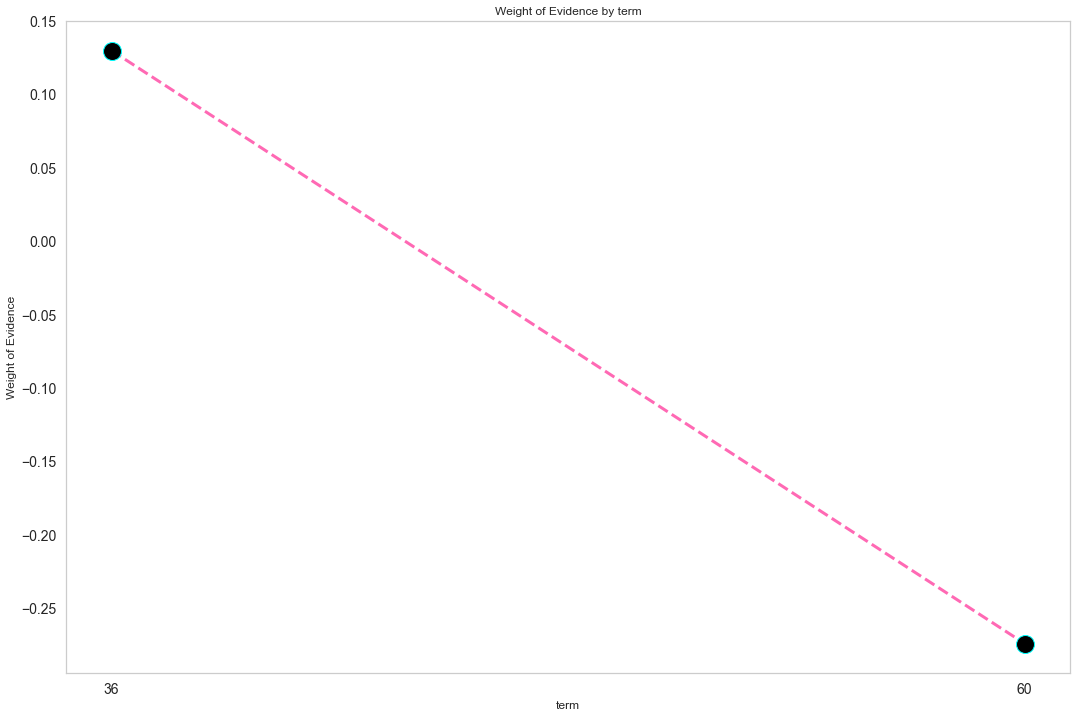

In [69]:
#analyzing term variable
plot_by_woe(woe_continous(X,'term', y ))

### 2. Analyzing months since issued variable

In [70]:
#check number of unique values in months since loan issued
X['mths_since_issue_d'].unique()

array([80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       93., 94., 95., 96., 68., 69., 70., 71., 72., 73., 74., 75., 76.,
       77., 78., 79.])

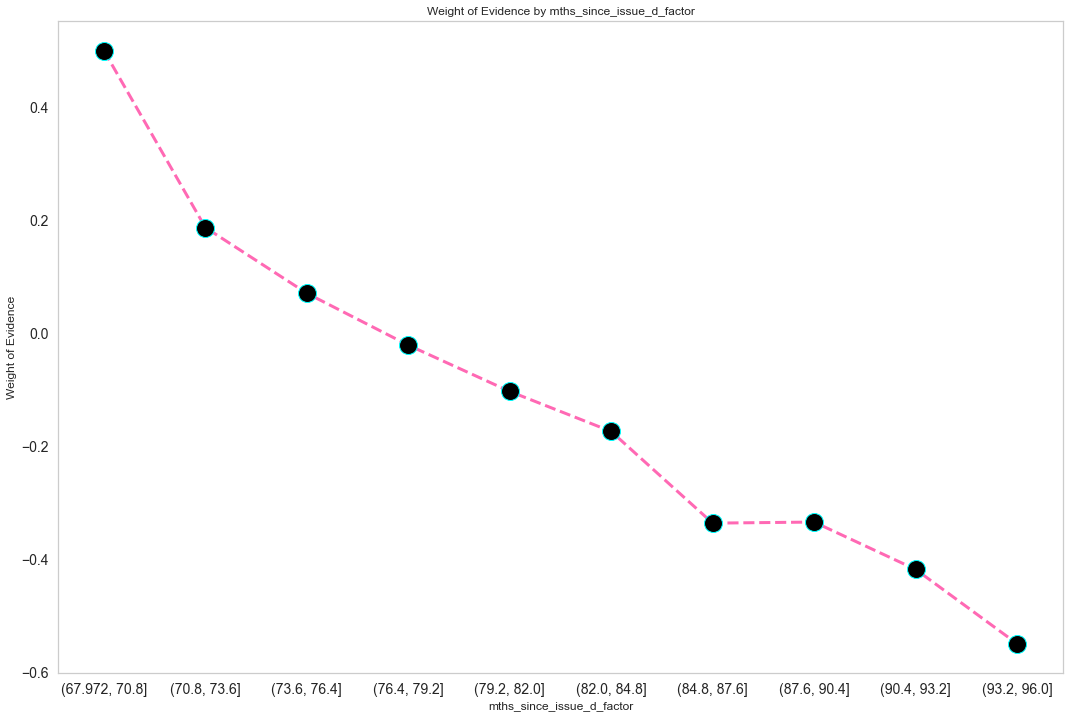

In [71]:
# fine classing by creating  a new variable

X['mths_since_issue_d_factor'] = pd.cut(X['mths_since_issue_d'], 10)
mths_since_iss_df = woe_continous(X, 'mths_since_issue_d_factor', y)
plot_by_woe(mths_since_iss_df)

The follwing categories will be created based on their WoE and number of observations

(67.97, 70.8)
(70.8, 73.6)
(73.6- 76.4)
(76.4.- 79.2)
(79.2-82)
(82-84)
(84-90.4)
(90.4-96)

### 3. Analyzing interest rate variable

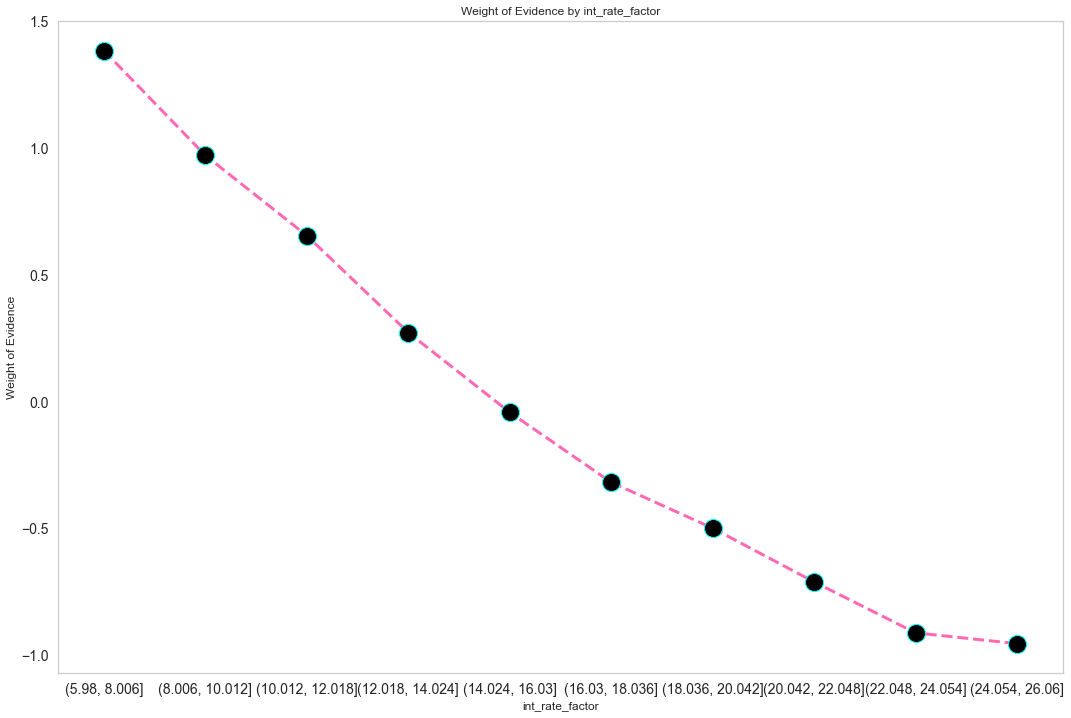

In [72]:
#Analyzing intrest rate
X['int_rate_factor'] = pd.cut(X['int_rate'], 10)
int_rate_df = woe_continous(X, 'int_rate_factor',y)
plot_by_woe(int_rate_df)

From the graph above only the last two categories will be combined.
(22.048, 26)

### 4. Analyzing total_rec_int variable

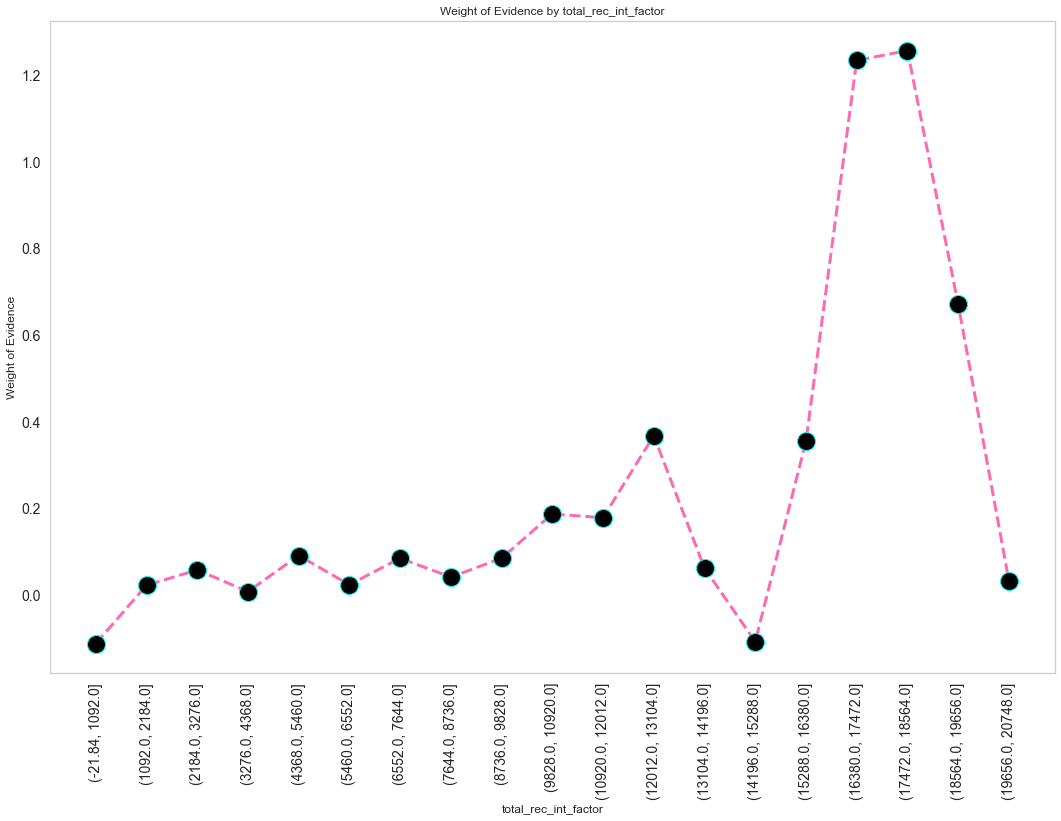

In [73]:
#Analyzing tot_rec_int
X['total_rec_int_factor'] = pd.cut(X['total_rec_int'], 20)
rec_int_df = woe_continous(X, 'total_rec_int_factor', y)
plot_by_woe(rec_int_df, 90)

### 5. Analyzing total revolving_high_limit variable

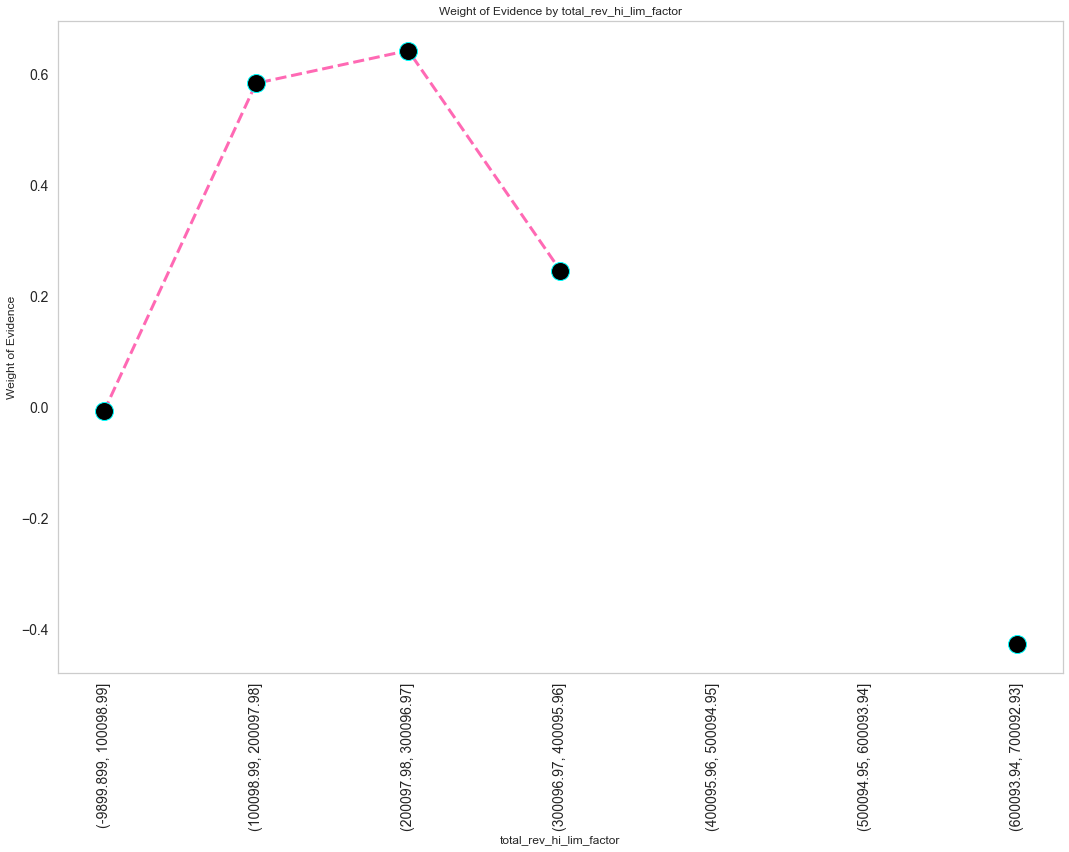

In [75]:
#anlyzing total_revol_hi_lim
X['total_rev_hi_lim_factor'] = pd.cut(X['total_rev_hi_lim'], 100)
revol_hi_df = woe_continous(X, 'total_rev_hi_lim_factor', y)
plot_by_woe(revol_hi_df, 90)

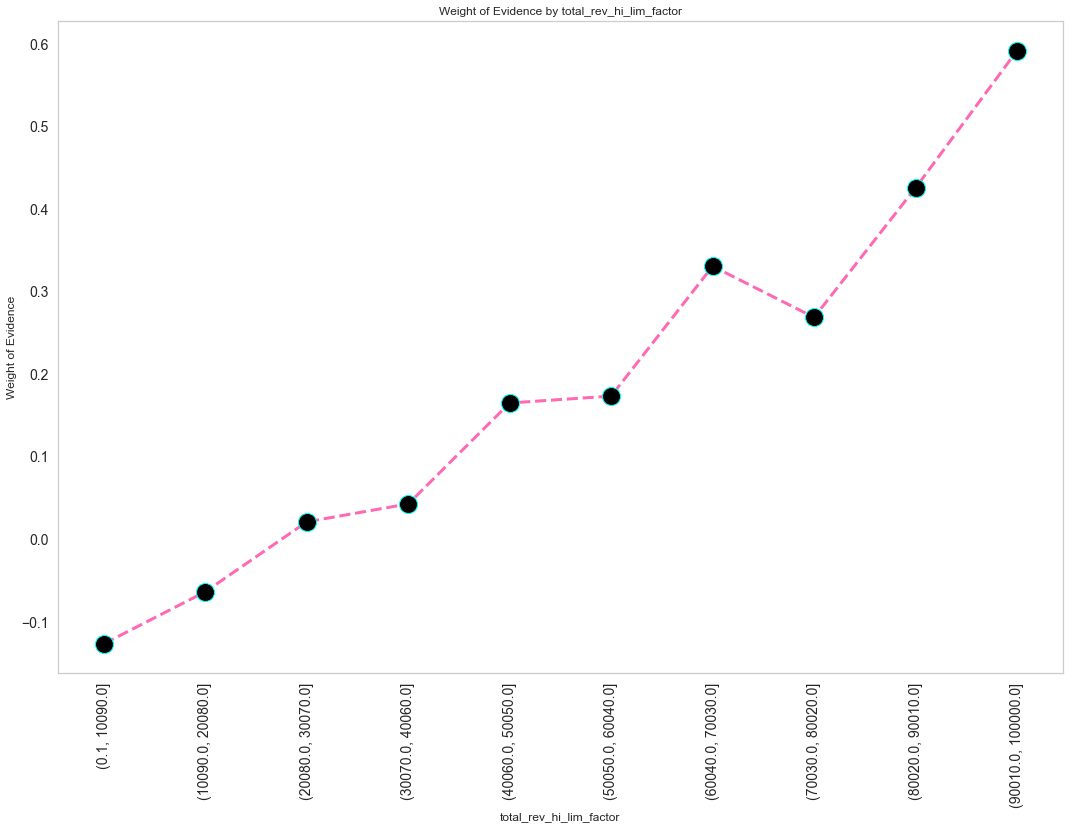

In [76]:
#analyzing below 100000
X_train_prepr_temp = X[X['total_rev_hi_lim'] <= 100000].copy()
# fine-classing again
X_train_prepr_temp['total_rev_hi_lim_factor'] = pd.cut(X_train_prepr_temp['total_rev_hi_lim'],10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'total_rev_hi_lim_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

### 6. Analyzing total_payment Variable

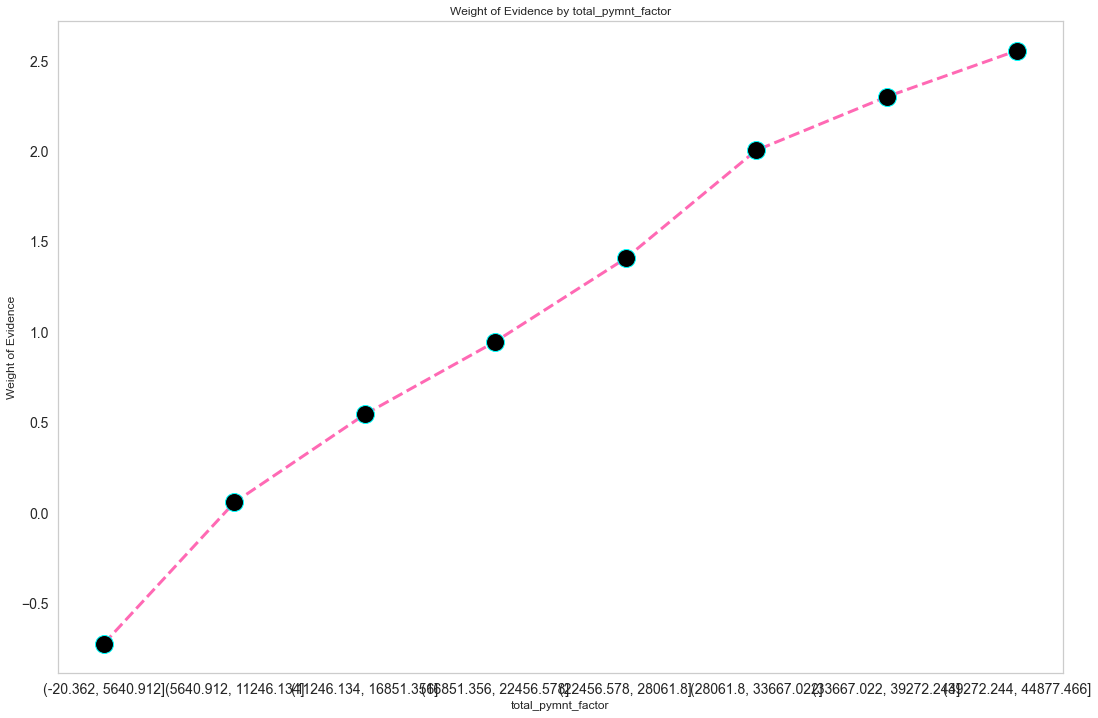

In [77]:
#Analyzing total_pymnt
X['total_pymnt_factor'] = pd.cut(X['total_pymnt'], 10)
total_pym_df = woe_continous(X, 'total_pymnt_factor', y)
plot_by_woe(total_pym_df)

### 7. Analyzing dti variable

"dti" is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

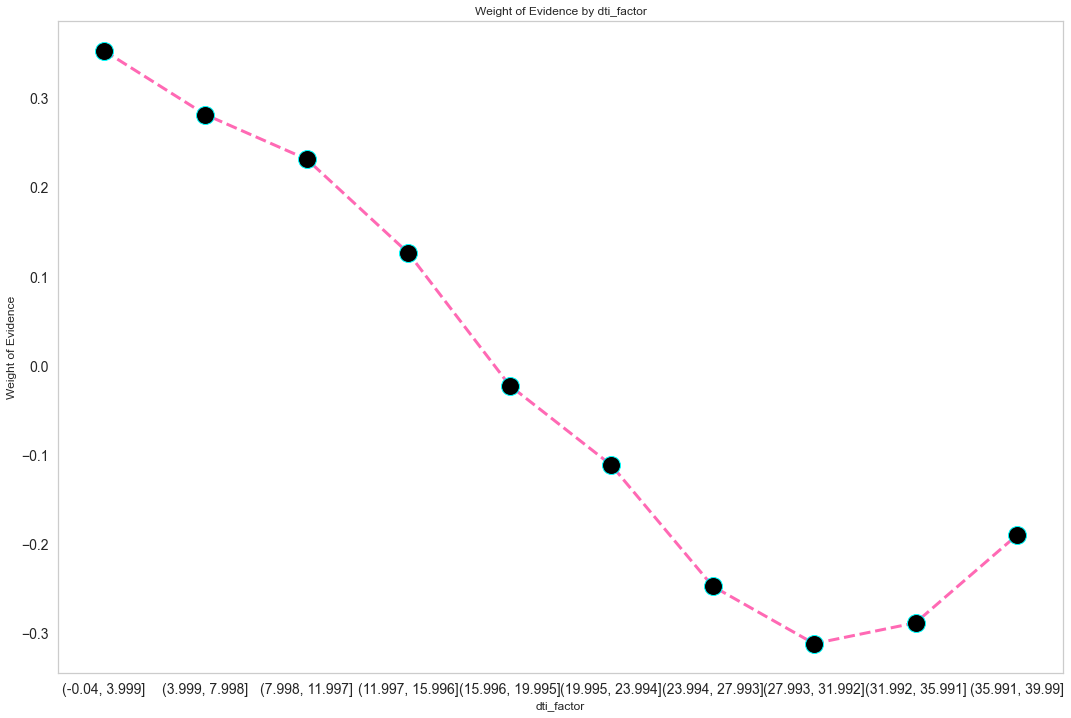

In [78]:
# analyzing dti 
X['dti_factor'] = pd.cut(X['dti'], 10)
dti_df = woe_continous(X, 'dti_factor', y)
plot_by_woe(dti_df)

The following categories will be combined:
(27.993, 31.992), (31.992, 35.991), (35.991, 39.99)

### 8. Analyzing annual_income variable

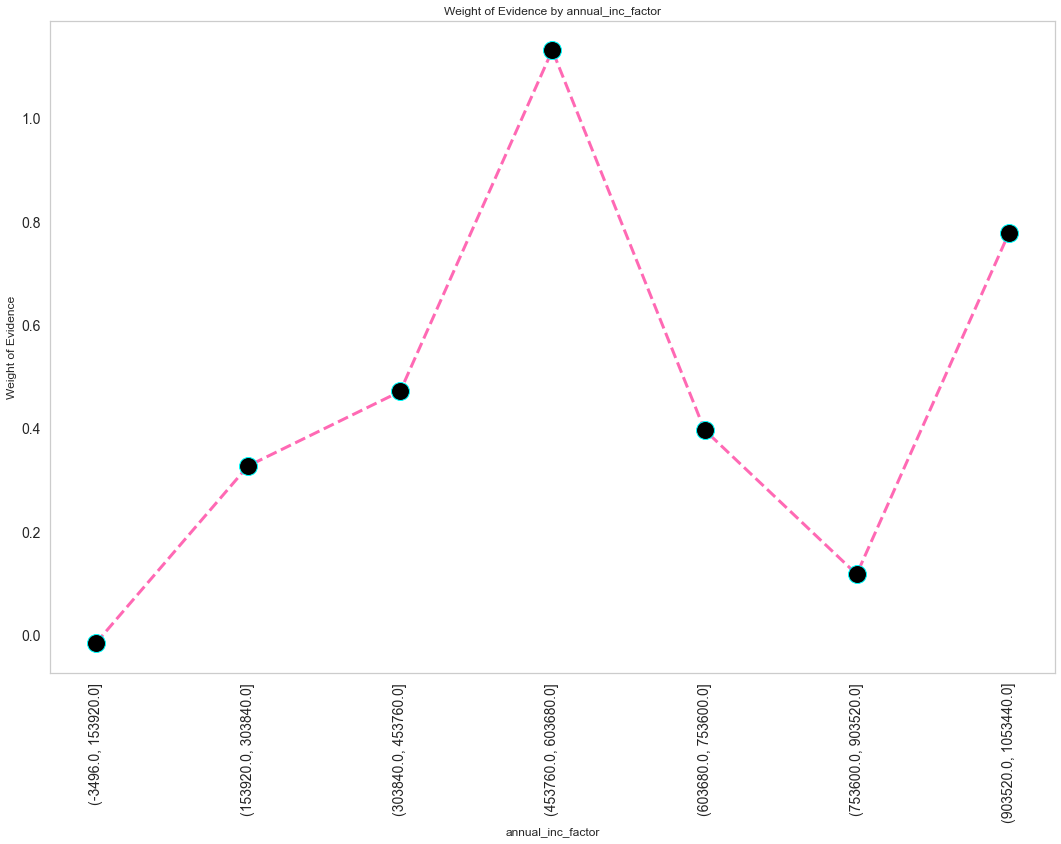

In [80]:
#Analyzing annual income
X['annual_inc_factor'] = pd.cut(X['annual_inc'], 50)
ann_inc_df = woe_continous(X, 'annual_inc_factor', y)
plot_by_woe(ann_inc_df, 90)

We will seperate this variable into people with higher and lower incomes. From the WoE table, we observe, when annual income increases, the the number of observations decreases. This is because only a few people earn high income. We will use a new variable for people with income above 150000 dollars. And also, analyze individuals with income below 150000 dollars.

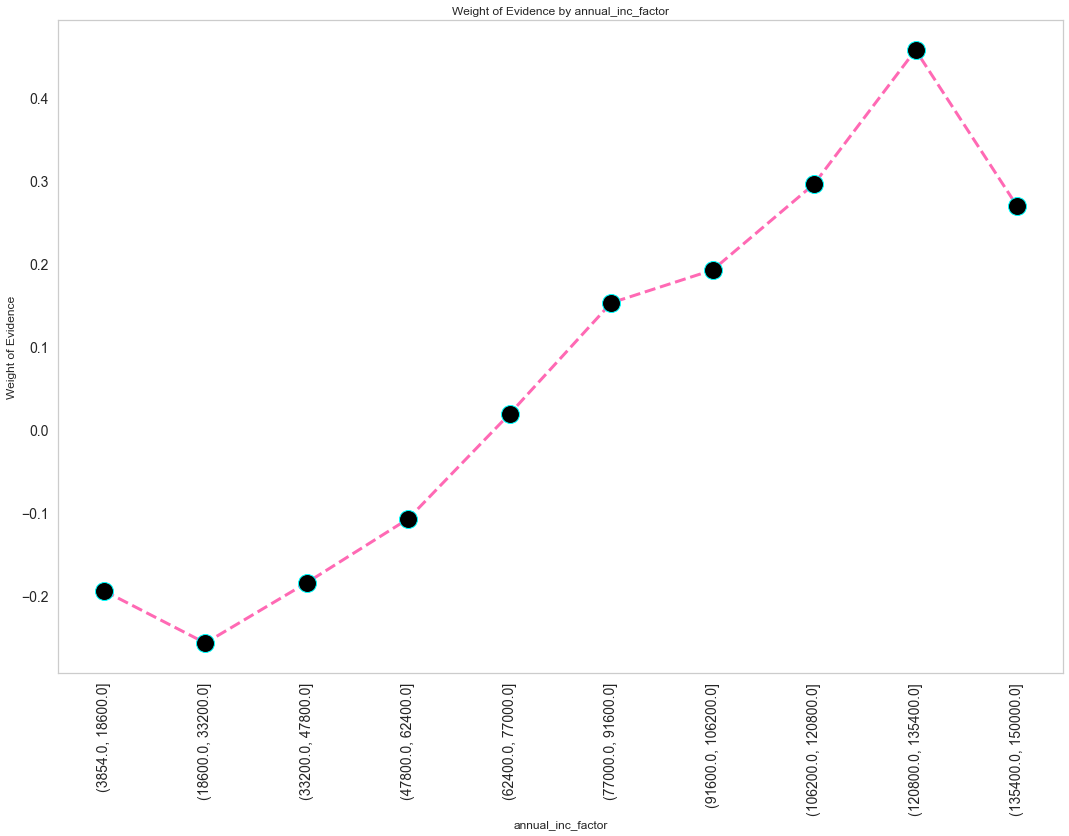

In [81]:
#Analyzing income  below 150000
X_train_prepr_temp = X[X['annual_inc'] <= 150000].copy()
# fine-classing again
X_train_prepr_temp['annual_inc_factor'] = pd.cut(X_train_prepr_temp['annual_inc'], 10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'annual_inc_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

From the graph, we will combine the follwing categories based on WoE and number of observations as follows:

(<=32000),
(>32000 <= 50000),
(>50000 <= 60000),
(>60000 <=75000),
(>75000 <=90000),
(>90000 <=120000),
(>120000 <=135000),
(>135000 <=150000),
(>150000)

### 9. Analyzing inq_last_6mths variable

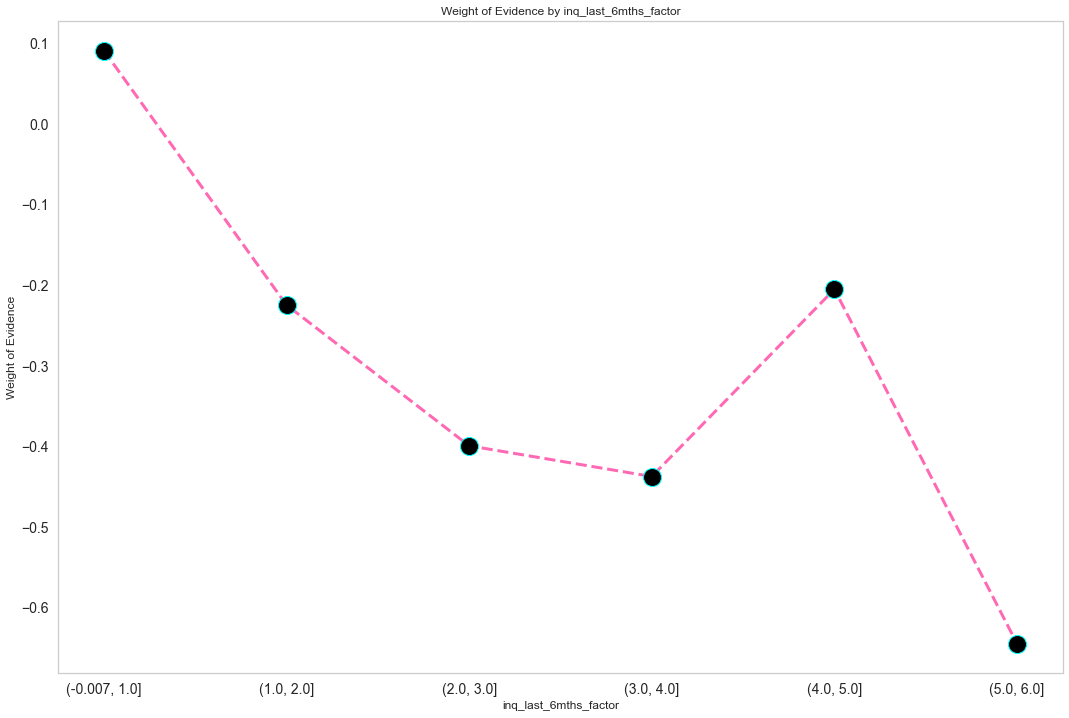

In [82]:
#analyzing inq_last_6mths
X['inq_last_6mths_factor'] = pd.cut(X['inq_last_6mths'], 7)
inq_fact_df = woe_continous(X, 'inq_last_6mths_factor', y)
plot_by_woe(inq_fact_df)

The follwing categories will be created

<1 months,
1-2,
2-4,
4-7

### 10. Analyzing total current balance variable

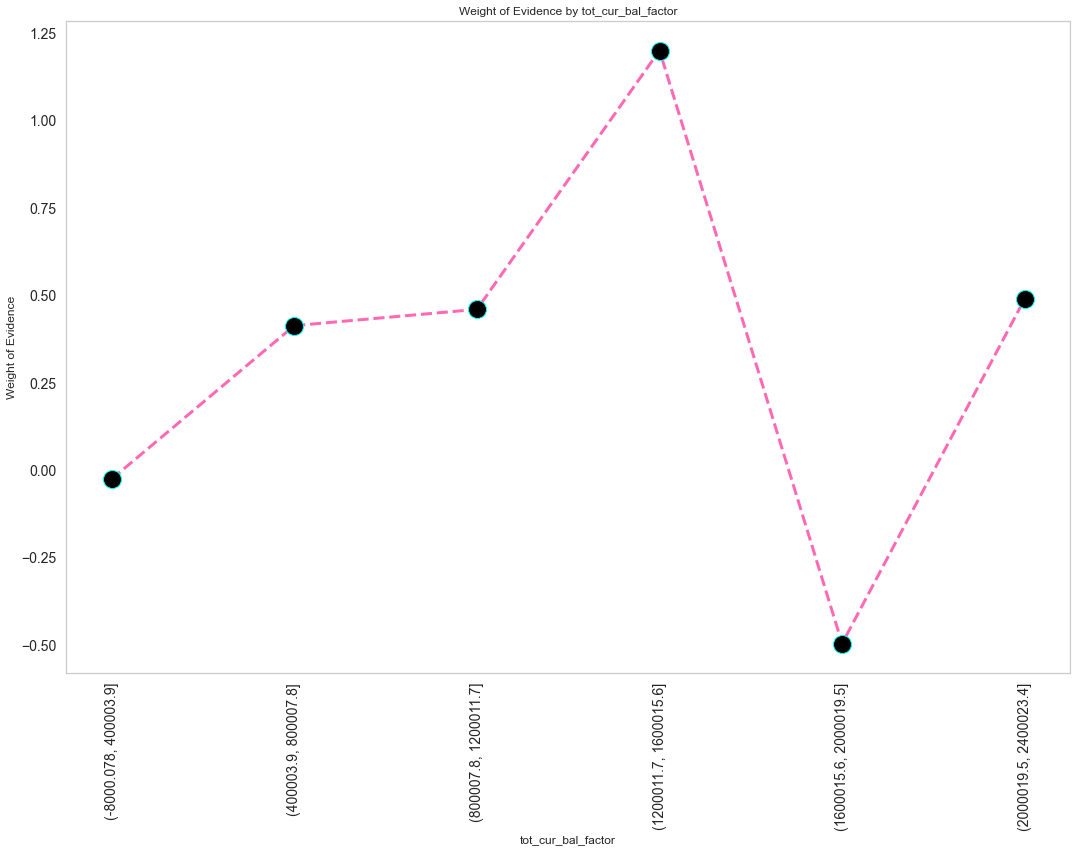

In [83]:
# analyzing total current balance
X['tot_cur_bal_factor'] = pd.cut(X['tot_cur_bal'], 20)
curr_bal_df = woe_continous(X, 'tot_cur_bal_factor', y)
plot_by_woe(curr_bal_df, 90)

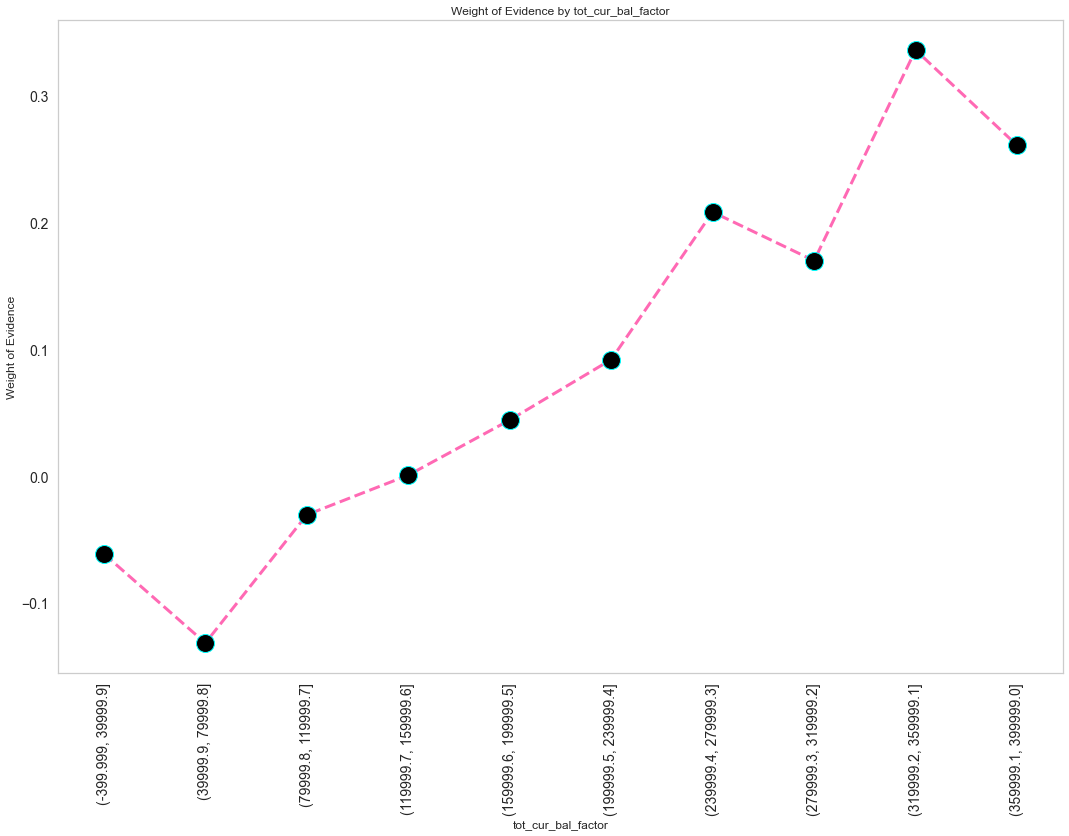

In [84]:
#Analyzing current balance  below 400000
X_train_prepr_temp = X[X['tot_cur_bal'] <= 400000].copy()
# fine-classing again
X_train_prepr_temp['tot_cur_bal_factor'] = pd.cut(X_train_prepr_temp['tot_cur_bal'], 10)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'tot_cur_bal_factor', y[X_train_prepr_temp.index])
plot_by_woe(df_temp, 90)

the following variables will be created:

<40000,
40000-80000,
80000-120000,
120000-160000,
160000-200000,
200000-240000,
240000-320000,
320000-400000

### 11. Analyzing months since credit pulled variable

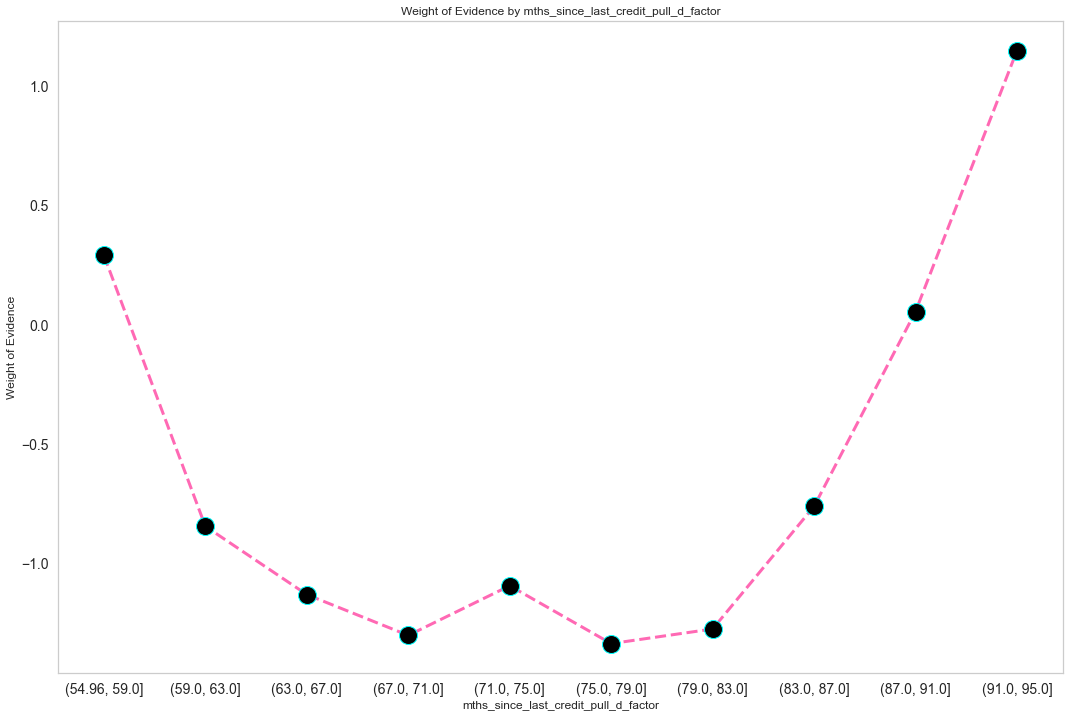

In [85]:
# analyzing mths_since_credit_pull 
X['mths_since_last_credit_pull_d_factor'] = pd.cut(X['mths_since_last_credit_pull_d'], 10)
mths_cr_pull_df = woe_continous(X, 'mths_since_last_credit_pull_d_factor', y)
plot_by_woe(mths_cr_pull_df)

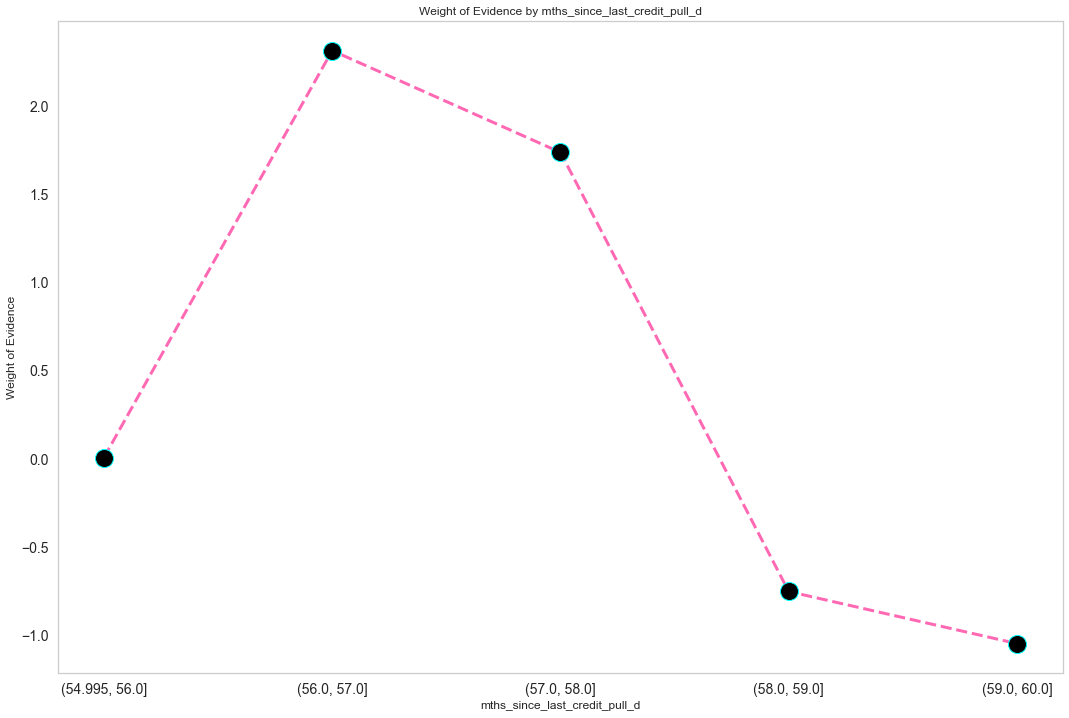

In [86]:
#Analyzing mths_since_credit_pull  below 60
X_train_prepr_temp = X[X['mths_since_last_credit_pull_d'] <= 60].copy()
# fine-classing again
X_train_prepr_temp['mths_since_last_credit_pull_d'] = pd.cut(X_train_prepr_temp['mths_since_last_credit_pull_d'], 5)
# make sure to select only the relevant indexes in the target column
df_temp = woe_continous(X_train_prepr_temp, 'mths_since_last_credit_pull_d', y[X_train_prepr_temp.index])
plot_by_woe(df_temp)

The following categories will be grouped together:

54-65,
65-76,
greater than 76

### 12. Analyzing out_prncp_factor variable

"out_prncp_factor" denotes remaining outstanding principal for total amount funded

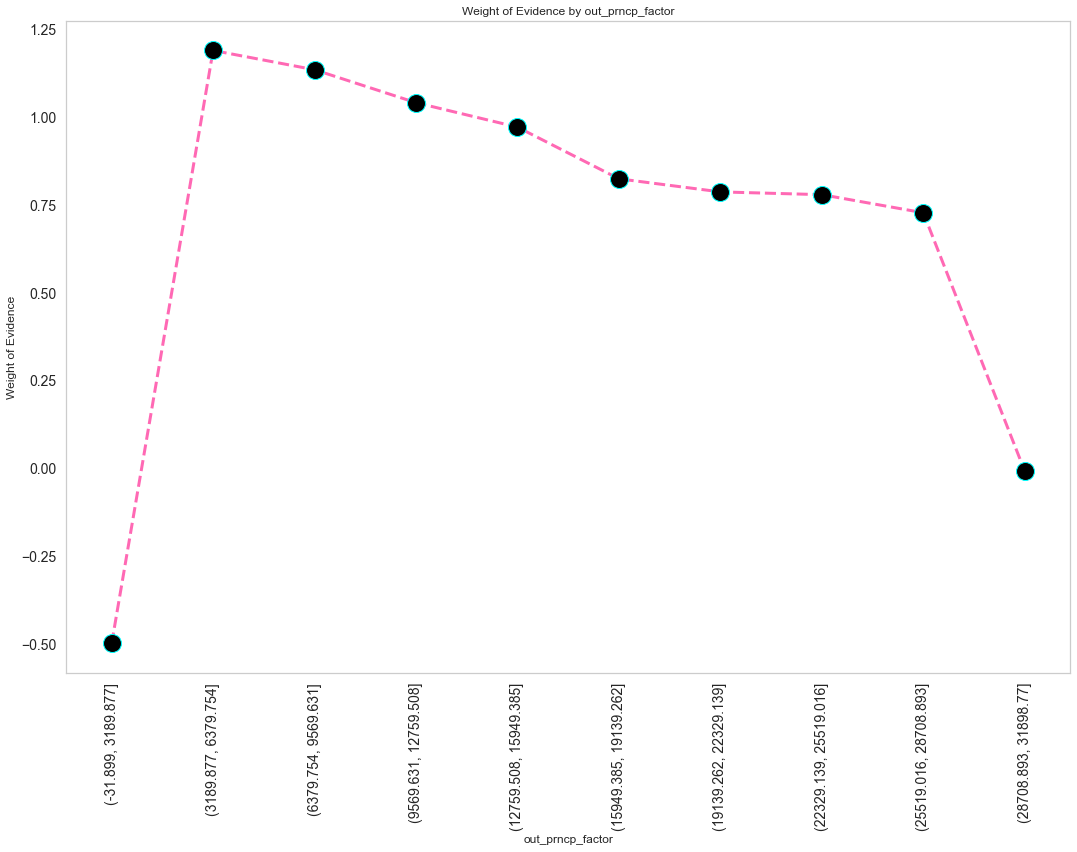

In [87]:
# analyzing out_prncp 
X['out_prncp_factor'] = pd.cut(X['out_prncp'], 10)
out_df = woe_continous(X, 'out_prncp_factor', y)
plot_by_woe(out_df, 90)

### 13. Analyzing months_since_issue_date variable

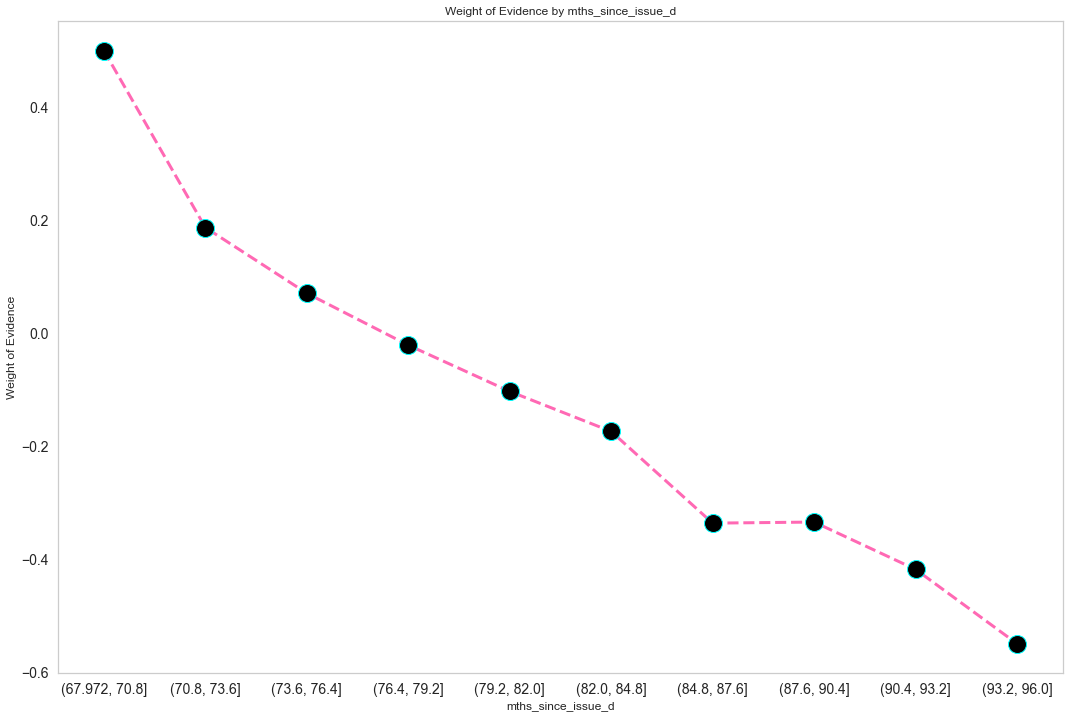

In [88]:
# analyzing mths_since_issue_date 
X['mths_since_issue_d'] = pd.cut(X['mths_since_issue_d'], 10)
iss_df = woe_continous(X, 'mths_since_issue_d', y)
plot_by_woe(iss_df)

## Creating New Features Based on WoE

In [89]:
# grade

new_df = preprocess_data.loc[:, 'grade:A':'grade:G']

# home_ownership 

new_df['home_ownership:OWN'] = preprocess_data.loc[:, 'home_ownership:OWN']
new_df['home_ownership:OTHER_NONE_RENT_ANY'] = sum([preprocess_data['home_ownership:OTHER'], preprocess_data['home_ownership:NONE'],
                                                 preprocess_data['home_ownership:RENT'], preprocess_data['home_ownership:ANY']])
new_df['home_ownership:MORTGAGE'] = preprocess_data.loc[:, 'home_ownership:MORTGAGE']

#verification status
new_df['verification_status:NOT_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Not Verified']
new_df['verification_status:SOURCE_VERIFIED'] = preprocess_data.loc[:, 'verification_status:Source Verified']
new_df['verification_status:VERIFIED'] = preprocess_data.loc[:, 'verification_status:Verified']

# purpose of loan
new_df['purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING'] = sum([preprocess_data['purpose:small_business'],  preprocess_data['purpose:renewable_energy'], preprocess_data['purpose:moving']])

new_df['purpose:OTHER_HOUSE_MEDICAL'] =sum([preprocess_data['purpose:other'], preprocess_data['purpose:house'], preprocess_data['purpose:medical']])
new_df ['purpose:WEDDING_VACATION'] = sum([preprocess_data['purpose:wedding'], preprocess_data['purpose:vacation']])
new_df ['purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE'] = sum([preprocess_data['purpose:home_improvement'], preprocess_data['purpose:major_purchase']])
new_df ['purpose:CAR_CREDIT_CARD'] = sum([preprocess_data['purpose:car'], preprocess_data['purpose:credit_card']])


# addr state
new_df['addr_state:NE_IA_NV_HI_FL_AL'] =sum([preprocess_data['addr_state:IA'],preprocess_data['addr_state:NV'],
                                           preprocess_data['addr_state:HI'],preprocess_data['addr_state:FL'],preprocess_data['addr_state:AL']])
new_df['addr_state:NY'] = preprocess_data.loc[:, 'addr_state:NY']
new_df['addr_state:LA_NM_OK_NC_MO_MD_NJ_VA'] = sum([preprocess_data['addr_state:LA'],preprocess_data['addr_state:NM'],preprocess_data['addr_state:OK'],
                     preprocess_data['addr_state:NC'],preprocess_data['addr_state:MO'],preprocess_data['addr_state:MD'], preprocess_data['addr_state:NJ'],
                                                  preprocess_data['addr_state:VA']])
new_df['addr_state:CA'] = preprocess_data.loc[:,'addr_state:CA']
new_df['addr_state:AZ_MI_UT_TN_AR_PA'] =sum([preprocess_data['addr_state:AZ'],preprocess_data['addr_state:MI'],preprocess_data['addr_state:UT'],
preprocess_data['addr_state:TN'],preprocess_data['addr_state:AR'],preprocess_data['addr_state:PA']])

new_df['addr_state:RI_OH_KY_DE_MN_SD_MA_IN'] =sum([preprocess_data['addr_state:RI'],preprocess_data['addr_state:OH'],preprocess_data['addr_state:KY'],
 preprocess_data['addr_state:DE'],preprocess_data['addr_state:MN'],preprocess_data['addr_state:SD'],preprocess_data['addr_state:MA'],
                    preprocess_data['addr_state:IN']])

new_df['addr_state:GA_WA'] = sum([preprocess_data['addr_state:GA'], preprocess_data['addr_state:WA']])
new_df['addr_state:WI_OR'] = sum([preprocess_data['addr_state:WI'], preprocess_data['addr_state:OR']])
new_df['addr_state:TX'] = preprocess_data.loc[:,'addr_state:TX']
new_df['addr_state:IL_CT_MT'] =sum([preprocess_data['addr_state:IL'],preprocess_data['addr_state:CT'],preprocess_data['addr_state:MT']])
new_df['addr_state:CO_SC'] = sum([preprocess_data['addr_state:CO'], preprocess_data['addr_state:SC']])
new_df['addr_state:KS_VT_AK_NS'] =sum([preprocess_data['addr_state:KS'],preprocess_data['addr_state:VT'],preprocess_data['addr_state:AK'],
                                           preprocess_data['addr_state:MS']])
new_df['addr_state:NH_WV_WY_DC'] =sum([preprocess_data['addr_state:NH'],preprocess_data['addr_state:WV'],preprocess_data['addr_state:WY'],
                                           preprocess_data['addr_state:DC']])
#initial_list_status
new_df['initial_list_status:F'] = preprocess_data.loc[:, 'initial_list_status:f']
new_df['initial_list_status:W'] = preprocess_data.loc[:, 'initial_list_status:w']

# term 
new_df['term:36'] = np.where((preprocess_data['term'] == 36), 1, 0)
new_df['term:60'] = np.where((preprocess_data['term']==60), 1,0)

#total_rec_int 
new_df['total_rec_int:<1000'] = np.where((preprocess_data['total_rec_int']<=1000), 1,0)
new_df['total_rec_int:1000-2000'] = np.where((preprocess_data['total_rec_int']>1000) &(preprocess_data['total_rec_int']<=2000), 1,0)
new_df['total_rec_int:2000-9000'] = np.where((preprocess_data['total_rec_int']>2000) &(preprocess_data['total_rec_int']<=9000), 1,0)
new_df['total_rec_int:>9000'] = np.where((preprocess_data['total_rec_int']>9000), 1,0)


#total_revol_hi_lim
new_df['total_rev_hi_lim:<10000'] =np.where((preprocess_data['total_rev_hi_lim']<=10000),1,0)
new_df['total_rev_hi_lim:10000-20000'] =np.where((preprocess_data['total_rev_hi_lim']>10000)&(preprocess_data['total_rev_hi_lim']<=20000),1,0)
new_df['total_rev_hi_lim:20000-40000'] =np.where((preprocess_data['total_rev_hi_lim']>20000)&(preprocess_data['total_rev_hi_lim']<=40000),1,0)
new_df['total_rev_hi_lim:40000-60000'] =np.where((preprocess_data['total_rev_hi_lim']>40000)&(preprocess_data['total_rev_hi_lim']<=60000),1,0)
new_df['total_rev_hi_lim:60000-80000'] =np.where((preprocess_data['total_rev_hi_lim']>60000)&(preprocess_data['total_rev_hi_lim']<=80000),1,0)
new_df['total_rev_hi_lim:80000-100000'] =np.where((preprocess_data['total_rev_hi_lim']>80000)&(preprocess_data['total_rev_hi_lim']<=100000),1,0)
new_df['total_rev_hi_lim:<100000'] =np.where((preprocess_data['total_rev_hi_lim']>100000),1,0)


#total_pymnt
new_df['total_pymnt:<5000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
new_df['total_pymnt:5000-11000'] = np.where((preprocess_data['total_pymnt']>5000)&(preprocess_data['total_pymnt']<=11000),1,0)
new_df['total_pymnt:11000-16000'] = np.where((preprocess_data['total_pymnt']>11000)&(preprocess_data['total_pymnt']<=16000),1,0)
new_df['total_pymnt:16000-22000'] = np.where((preprocess_data['total_pymnt']>16000)&(preprocess_data['total_pymnt']<=22000),1,0)
new_df['total_pymnt:>22000'] = np.where((preprocess_data['total_pymnt']<=5000), 1,0)
#int_Rate

new_df['int_rate:<7.484'] = np.where((preprocess_data['int_rate'] <= 7.484), 1, 0)
new_df['int_rate:7.484-9.548'] = np.where((preprocess_data['int_rate'] > 7.484) & (preprocess_data['int_rate'] <= 9.548), 1, 0)
new_df['int_rate:9.548-11.612'] = np.where((preprocess_data['int_rate'] > 9.548) & (preprocess_data['int_rate'] <= 11.612), 1, 0)
new_df['int_rate:11.612-13.676'] = np.where((preprocess_data['int_rate'] > 11.612) & (preprocess_data['int_rate'] <= 13.676), 1, 0)
new_df['int_rate:13.676-15.74'] = np.where((preprocess_data['int_rate'] > 13.676) & (preprocess_data['int_rate'] <= 15.74), 1, 0)
new_df['int_rate:15.74-17.804'] = np.where((preprocess_data['int_rate'] > 15.74) & (preprocess_data['int_rate'] <= 17.804), 1, 0)
new_df['int_rate:17.804-19.868'] = np.where((preprocess_data['int_rate'] > 17.804) & (preprocess_data['int_rate'] <= 19.868), 1, 0)
new_df['int_rate:7.19.868-21.932'] = np.where((preprocess_data['int_rate'] > 19.868) & (preprocess_data['int_rate'] <= 21.932), 1, 0)
new_df['int_rate:21.932-26.06'] = np.where((preprocess_data['int_rate'] > 21.932) & (preprocess_data['int_rate'] <= 26.06), 1, 0)


#dti 
new_df['dti:<4'] = np.where((preprocess_data['dti'] <=4), 1, 0)
new_df['dti:4-8'] = np.where((preprocess_data['dti'] > 4) & (preprocess_data['dti'] <= 8), 1, 0)
new_df['dti:8-12'] = np.where((preprocess_data['dti'] > 8) & (preprocess_data['dti'] <= 12), 1, 0)
new_df['dti:12-16'] = np.where((preprocess_data['dti'] > 12) & (preprocess_data['dti'] <= 16), 1, 0)
new_df['dti:16-20'] = np.where((preprocess_data['dti'] > 16) & (preprocess_data['dti'] <= 20), 1, 0)
new_df['dti:20-23'] = np.where((preprocess_data['dti'] > 20) & (preprocess_data['dti'] <= 23), 1, 0)
new_df['dti:23-27'] = np.where((preprocess_data['dti'] > 23) & (preprocess_data['dti'] <= 27), 1, 0)
new_df['dti:27-40'] = np.where((preprocess_data['dti'] > 27) & (preprocess_data['dti'] <= 40), 1, 0)

#annual income 
new_df['annual_inc:<32000'] = np.where((preprocess_data['annual_inc'] <= 32000), 1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000),1, 0)
new_df['annual_inc:32000-50000'] = np.where((preprocess_data['annual_inc'] > 32000) & (preprocess_data['annual_inc'] <= 50000), 1, 0)
new_df['annual_inc:50000-60000'] = np.where((preprocess_data['annual_inc'] > 50000) & (preprocess_data['annual_inc'] <= 60000), 1, 0)
new_df['annual_inc:60000-75000'] = np.where((preprocess_data['annual_inc'] > 60000) & (preprocess_data['annual_inc'] <= 75000), 1, 0)
new_df['annual_inc:75000-90000'] = np.where((preprocess_data['annual_inc'] > 75000) & (preprocess_data['annual_inc'] <= 90000), 1, 0)
new_df['annual_inc:90000-120000'] = np.where((preprocess_data['annual_inc'] > 90000) & (preprocess_data['annual_inc'] <= 120000), 1, 0)
new_df['annual_inc:120000-135000'] = np.where((preprocess_data['annual_inc'] > 120000) & (preprocess_data['annual_inc'] <= 135000), 1, 0)
new_df['annual_inc:135000-150000'] = np.where((preprocess_data['annual_inc'] > 135000) & (preprocess_data['annual_inc'] <= 150000), 1, 0)
new_df['annual_inc:>150000'] = np.where((preprocess_data['annual_inc'] > 150000), 1, 0)

#inq_last_6mths
new_df['inq_last_6mths:<1'] = np.where((preprocess_data['inq_last_6mths'] <=1), 1, 0)
new_df['inq_last_6mths:1-2'] = np.where((preprocess_data['inq_last_6mths'] >1)& (preprocess_data['inq_last_6mths']<=2),  1, 0)
new_df['inq_last_6mths:2-4'] = np.where((preprocess_data['inq_last_6mths'] >2)& (preprocess_data['inq_last_6mths']<=4),  1, 0)
new_df['inq_last_6mths:4-7'] = np.where((preprocess_data['inq_last_6mths'] >4)& (preprocess_data['inq_last_6mths']<=7),  1, 0)

# #revol_util
# new_df['revol_util:<44'] = np.where((preprocess_data['revol_util'] <=44), 1,0)
# new_df['revol_util:44-89'] =np.where((preprocess_data['revol_util'] > 44) & (preprocess_data['revol_util'] <= 89),1, 0)
# new_df['revol_util:>89'] = np.where((preprocess_data['revol_util'] >89), 1,0)

#tot_cur_balance
new_df['tot_cur_bal:<40000'] = np.where((preprocess_data['tot_cur_bal'] <= 40000), 1, 0)
new_df['tot_cur_bal:40000-80000'] = np.where((preprocess_data['tot_cur_bal'] > 40000) & (preprocess_data['tot_cur_bal'] <= 80000), 1, 0)
new_df['tot_cur_bal:80000-120000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:120000-160000'] = np.where((preprocess_data['tot_cur_bal'] > 120000) & (preprocess_data['tot_cur_bal'] <= 160000), 1, 0)
new_df['tot_cur_bal:160000-200000'] = np.where((preprocess_data['tot_cur_bal'] > 160000) & (preprocess_data['tot_cur_bal'] <= 200000), 1, 0)
new_df['tot_cur_bal:200000-240000'] = np.where((preprocess_data['tot_cur_bal'] > 200000) & (preprocess_data['tot_cur_bal'] <= 240000), 1, 0)
new_df['tot_cur_bal:240000-320000'] = np.where((preprocess_data['tot_cur_bal'] > 240000) & (preprocess_data['tot_cur_bal'] <= 320000), 1, 0)
new_df['tot_cur_bal:320000-400000'] = np.where((preprocess_data['tot_cur_bal'] > 320000) & (preprocess_data['tot_cur_bal'] <= 400000), 1, 0)
new_df['tot_cur_bal:>400000'] = np.where((preprocess_data['tot_cur_bal'] > 400000), 1, 0)

#mths_since_last_credit_pull_d
new_df['mths_since_last_credit_pull_d:<65'] = np.where((preprocess_data['mths_since_last_credit_pull_d']<=65), 1,0)
new_df['mths_since_last_credit_pull_d:65-76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>65)&(preprocess_data['mths_since_last_credit_pull_d']<=76),1,0)
new_df['mths_since_last_credit_pull_d:>76'] = np.where((preprocess_data['mths_since_last_credit_pull_d']>76), 1,0)

#mths_since_issue_d_factor
new_df['mths_since_issue_d_:<70.8'] = np.where((preprocess_data['mths_since_issue_d']<=70.8), 1,0)
new_df['mths_since_issue_d_:>70.8-73.6'] = np.where((preprocess_data['mths_since_issue_d'] >70.8) & (preprocess_data['mths_since_issue_d']<=73.6), 1,0)
new_df['mths_since_issue_d_:73.6-76.4'] = np.where((preprocess_data['mths_since_issue_d']>70.8) & (preprocess_data['mths_since_issue_d']<=76.4), 1,0)
new_df['mths_since_issue_d_:>76.4-79.2'] = np.where((preprocess_data['mths_since_issue_d'] >76.4) & (preprocess_data['mths_since_issue_d']<=79.2), 1,0)
new_df['mths_since_issue_d_:>79.2-82'] = np.where((preprocess_data['mths_since_issue_d'] >79.2) & (preprocess_data['mths_since_issue_d']<=82), 1,0)
new_df['mths_since_issue_d_>82-84'] = np.where((preprocess_data['mths_since_issue_d'] >82) & (preprocess_data['mths_since_issue_d']<=84), 1,0)
new_df['mths_since_issue_d_:>84-90.4'] = np.where((preprocess_data['mths_since_issue_d'] >84) & (preprocess_data['mths_since_issue_d']<=90.4), 1,0)
new_df['mths_since_issue_d_:>90.4-96'] = np.where((preprocess_data['mths_since_issue_d'] >90.4) & (preprocess_data['mths_since_issue_d']<=96), 1,0)

new_df['out_prncp:<3000'] = np.where((preprocess_data['out_prncp']<=3000), 1,0)
new_df['out_prncp:3000-6000'] = np.where((preprocess_data['out_prncp']>3000)&(preprocess_data['out_prncp']<=6000), 1,0)
new_df['out_prncp:6000-10000'] = np.where((preprocess_data['out_prncp']>6000)&(preprocess_data['out_prncp']<=10000), 1,0)
new_df['out_prncp:10000-12000'] = np.where((preprocess_data['out_prncp']>10000)&(preprocess_data['out_prncp']<=12000), 1,0)
new_df['out_prncp:>12000'] = np.where((preprocess_data['out_prncp']>12000), 1,0)

new_df['bad_loan'] = preprocess_data.loc[:, 'bad_loan']

In [90]:
#Displaying first 10 rows of new_df
pd.options.display.max_columns = None
new_df.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:OWN,home_ownership:OTHER_NONE_RENT_ANY,home_ownership:MORTGAGE,verification_status:NOT_VERIFIED,verification_status:SOURCE_VERIFIED,verification_status:VERIFIED,purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING,purpose:OTHER_HOUSE_MEDICAL,purpose:WEDDING_VACATION,purpose:HOME_IMPROVEMENT_MAJOR_PURCHASE,purpose:CAR_CREDIT_CARD,addr_state:NE_IA_NV_HI_FL_AL,addr_state:NY,addr_state:LA_NM_OK_NC_MO_MD_NJ_VA,addr_state:CA,addr_state:AZ_MI_UT_TN_AR_PA,addr_state:RI_OH_KY_DE_MN_SD_MA_IN,addr_state:GA_WA,addr_state:WI_OR,addr_state:TX,addr_state:IL_CT_MT,addr_state:CO_SC,addr_state:KS_VT_AK_NS,addr_state:NH_WV_WY_DC,initial_list_status:F,initial_list_status:W,term:36,term:60,total_rec_int:<1000,total_rec_int:1000-2000,total_rec_int:2000-9000,total_rec_int:>9000,total_rev_hi_lim:<10000,total_rev_hi_lim:10000-20000,total_rev_hi_lim:20000-40000,total_rev_hi_lim:40000-60000,total_rev_hi_lim:60000-80000,total_rev_hi_lim:80000-100000,total_rev_hi_lim:<100000,total_pymnt:<5000,total_pymnt:5000-11000,total_pymnt:11000-16000,total_pymnt:16000-22000,total_pymnt:>22000,int_rate:<7.484,int_rate:7.484-9.548,int_rate:9.548-11.612,int_rate:11.612-13.676,int_rate:13.676-15.74,int_rate:15.74-17.804,int_rate:17.804-19.868,int_rate:7.19.868-21.932,int_rate:21.932-26.06,dti:<4,dti:4-8,dti:8-12,dti:12-16,dti:16-20,dti:20-23,dti:23-27,dti:27-40,annual_inc:<32000,annual_inc:32000-50000,annual_inc:50000-60000,annual_inc:60000-75000,annual_inc:75000-90000,annual_inc:90000-120000,annual_inc:120000-135000,annual_inc:135000-150000,annual_inc:>150000,inq_last_6mths:<1,inq_last_6mths:1-2,inq_last_6mths:2-4,inq_last_6mths:4-7,tot_cur_bal:<40000,tot_cur_bal:40000-80000,tot_cur_bal:80000-120000,tot_cur_bal:120000-160000,tot_cur_bal:160000-200000,tot_cur_bal:200000-240000,tot_cur_bal:240000-320000,tot_cur_bal:320000-400000,tot_cur_bal:>400000,mths_since_last_credit_pull_d:<65,mths_since_last_credit_pull_d:65-76,mths_since_last_credit_pull_d:>76,mths_since_issue_d_:<70.8,mths_since_issue_d_:>70.8-73.6,mths_since_issue_d_:73.6-76.4,mths_since_issue_d_:>76.4-79.2,mths_since_issue_d_:>79.2-82,mths_since_issue_d_>82-84,mths_since_issue_d_:>84-90.4,mths_since_issue_d_:>90.4-96,out_prncp:<3000,out_prncp:3000-6000,out_prncp:6000-10000,out_prncp:10000-12000,out_prncp:>12000,bad_loan
42537,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42538,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42539,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42541,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42543,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
42544,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
42547,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
42548,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0

In [91]:
new_df1 = new_df

Now we must remove 1 dummy variable for each original variable, otherwise we will get into the dummy variable trap. The dummy variables to be removed are those with the lowest WoE.

In [ ]:
#dummy categories to drop
ref_categories = ['home_ownership:OTHER_NONE_RENT_ANY', 'total_rec_int:<1000', 'total_pymnt:<5000','total_rev_hi_lim:<10000', 'grade:G', 'verification_status:VERIFIED', 'purpose:SMALL_BUSINESS_EDUCATIONAL_RENEWABLE_ENERGY_MOVING',
                 'addr_state:NE_IA_NV_HI_FL_AL', 'initial_list_status:F', 'term:60', 'mths_since_issue_d_:>90.4-96','int_rate:21.932-26.06', 'dti:27-40',
                 'annual_inc:<32000', 'inq_last_6mths:4-7', 'tot_cur_bal:<40000', 'mths_since_last_credit_pull_d:>76', 'out_prncp:>12000']
#columns dropped
new_df.drop(columns=ref_categories, inplace=True, axis=1)

## Checking for Class Imbalance in the Fully Preprocessed Dataset

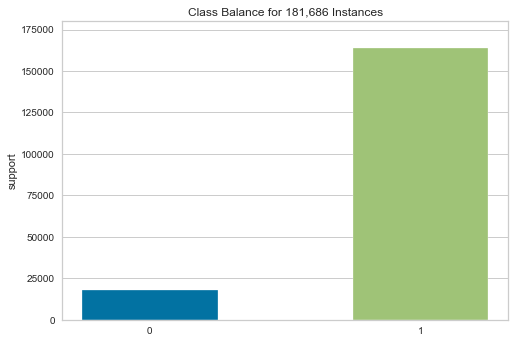

<AxesSubplot:title={'center':'Class Balance for 181,686 Instances'}, ylabel='support'>

In [94]:
#checking  to see if class labels are balanced

from yellowbrick.target import ClassBalance
X= new_df.drop(columns='bad_loan', axis=1)
y = new_df['bad_loan']
visualizer = ClassBalance()
visualizer.fit(y)
visualizer.show()

From the chart above, we see the individuals classified as bad borrowers have very few observations. This class imbalance can affect our model while training. To solve this problem, we will oversample the minority class.

# Splitting into Train and Test

In [95]:
#spliting data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#checking  imbalance data for training dataset
y_train.value_counts()

1    131088
0     14260
Name: bad_loan, dtype: int64

## Oversampling Minority Class to Resolve Class Imbalance

In [97]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [98]:
#importing libraries for model training
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [99]:
#dealing with imbalance data
os = RandomOverSampler()
X_train_o, y_train_o = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_o)
#check value counts after oversampling
y_train_series.value_counts()

0    131088
1    131088
Name: bad_loan, dtype: int64

## Building PD Model (Logistic Regression)

In [100]:
#building model
model = LogisticRegression()
model.fit(X_train_o, y_train_o)

LogisticRegression()

In [101]:
#predicting
y_preds = model.predict(X_test)
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.28      0.79      0.42      3564
           1       0.97      0.78      0.87     32774

    accuracy                           0.78     36338
   macro avg       0.63      0.79      0.64     36338
weighted avg       0.90      0.78      0.82     36338



In [102]:
y_hat_test_proba = model.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba), pd.DataFrame(y_preds)], axis = 1)
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba', 'y_hat_test']
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba,y_hat_test
464607,1,0.935594,1
71520,1,0.761492,1
46581,1,0.892588,1
172142,1,0.439560,0
463250,1,0.910921,1


## Assessing Discriminatory Power of the PD Model

1 A. ROC Curve

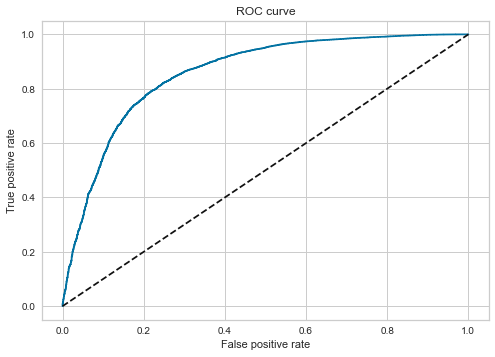

In [103]:
# get the values required to plot a ROC curve
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, to plot randomness of model
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

1 B. Area under ROC Curve

In [104]:
#Area under receiver operating charateristic cure
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.8567319854430063

2. Gini Index

In [105]:
Gini = AUROC * 2 - 1
Gini

0.7134639708860127

3A. Precision-Recall Curve

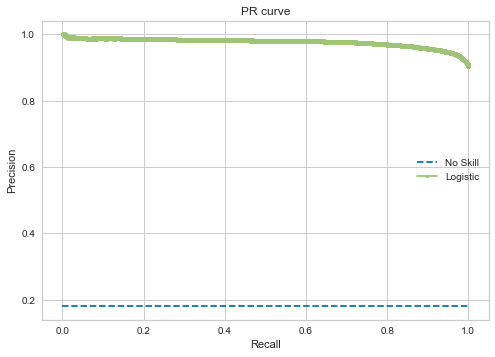

In [106]:
from sklearn.metrics import precision_recall_curve, auc

# calculate the no skill line as the proportion of the positive class
no_skill = len(y_test[y_test == 1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate inputs for the PR curve
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot PR curve
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

3 B. Precision-Recall Score

In [107]:
#precision recall score
auc_pr = auc(recall, precision)
auc_pr

0.9767574123551661

4. Kolmogorov-Smirnov Statistic

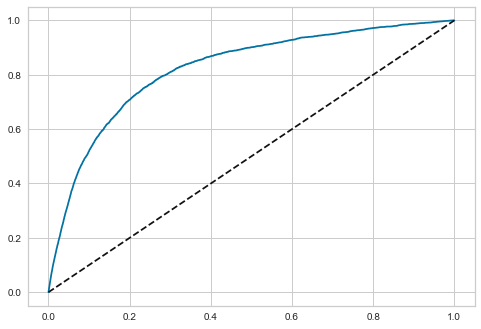

In [108]:
# calcualting ks statistic
actual_predicted_probs_df = y_test_proba.sort_values('y_hat_test_proba')
actual_predicted_probs_df = actual_predicted_probs_df.reset_index()
actual_predicted_probs_df['cum_n_pop'] = actual_predicted_probs_df.index +1
actual_predicted_probs_df['cum_good'] = actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_bad'] = actual_predicted_probs_df['cum_n_pop'] - actual_predicted_probs_df['y_test_class_actual'].cumsum()
actual_predicted_probs_df['cum_n_%'] = actual_predicted_probs_df['cum_n_pop']/(actual_predicted_probs_df.shape[0])
actual_predicted_probs_df['cum_good_%'] = actual_predicted_probs_df['cum_good']/actual_predicted_probs_df['y_test_class_actual'].sum()
actual_predicted_probs_df['cum_bad_%'] = actual_predicted_probs_df['cum_bad']/ (actual_predicted_probs_df.shape[0]-actual_predicted_probs_df['y_test_class_actual'].sum())
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_bad_%'])
plt.plot(actual_predicted_probs_df['cum_n_%'], actual_predicted_probs_df['cum_n_%'], linestyle='--', c='k')

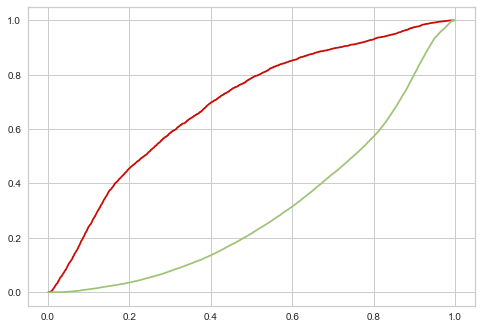

In [109]:
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_bad_%'], c='r')
plt.plot(actual_predicted_probs_df['y_hat_test_proba'], actual_predicted_probs_df['cum_good_%'], c='g')

In [110]:
ks = max(actual_predicted_probs_df['cum_bad_%'] - actual_predicted_probs_df['cum_good_%'])
print('The KS score is ',ks)

The KS score is  0.5731399140198798


All the scores above indicate the created PD model is an efficient one to apply on new data for getting accurate prediction.

In [ ]:
# import pickle
# filename = 'credit_risk_PD_model.sav'
# pickle.dump(model, open(filename, 'wb'))